# Market Segmentation Project 

# Importing  Library

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
from sklearn import metrics
import warnings

warnings.filterwarnings ("ignore")

# Loading Dataset

In [75]:
df = pd.read_csv("Final_Customer_Data_v3.csv")
df

CUST_ID      BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
0      C10001    40.900749           0.818182     95.400000          0.000000   
1      C10002  3202.467416           0.909091      0.000000          0.000000   
2      C10003  2495.148862           1.000000    773.170000        773.170000   
3      C10004  1666.670542           0.636364   1499.000000       1499.000000   
4      C10005   817.714335           1.000000     16.000000         16.000000   
...       ...          ...                ...           ...               ...   
60445  C19154          NaN           0.226474   8238.438225      21801.704132   
60446  C33754          NaN           0.307606  37143.039261      27986.013029   
60447  C41074          NaN           0.368211  12878.836039      23816.478882   
60448  C17982          NaN           0.107981  14110.339021      16691.185710   
60449  C51930          NaN           0.627632  34626.443303      33300.182334   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.400000      0.000000             0.166667   
1                    0.000000   6442.945483             0.000000   
2                    0.000000      0.000000             1.000000   
3                    0.000000    205.788017             0.083333   
4                    0.000000      0.000000             0.083333   
...                       ...           ...                  ...   
60445             1536.123651  35239.955577             0.929502   
60446            17059.951772  22657.659913             0.205363   
60447            21344.216246  37170.061997             0.608675   
60448            19655.863965  13063.107243             0.946414   
60449             5325.312145  33421.727874             0.746149   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.000000                          0.083333   
1                        0.000000                          0.000000   
2                        1.000000                          0.000000   
3                        0.083333                          0.000000   
4                        0.083333                          0.000000   
...                           ...                               ...   
60445                    0.463192                          0.282620   
60446                    0.535996                          0.422172   
60447                    0.079632                          0.568956   
60448                    0.609091                          0.095855   
60449                    0.856358                          0.366771   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.000000                 0              2        1000.0   
1                    0.250000                 4              0        7000.0   
2                    0.000000                 0             12        7500.0   
3                    0.083333                 1              1        7500.0   
4                    0.000000                 0              1        1200.0   
...                       ...               ...            ...           ...   
60445                0.474460               119             91           NaN   
60446                0.907725                29            165           NaN   
60447                1.035051                99            110           NaN   
60448                1.007543                 1             26           NaN   
60449                0.675992                23              4           NaN   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        201.802084        139.509787          0.000000      12  
1       4103.032597       1072.340217          0.222222      12  
2        622.066742        627.284787          0.000000      12  
3          0.000000               NaN          0.000000      12  
4        678.334763        244.791237          0.000000      12  
...   

# EDA(Exploratory Data Analysis)

In [76]:
df.shape 

(60450, 18)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60450 entries, 0 to 60449
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           60450 non-null  object 
 1   BALANCE                           58450 non-null  float64
 2   BALANCE_FREQUENCY                 60450 non-null  float64
 3   PURCHASES                         60450 non-null  float64
 4   ONEOFF_PURCHASES                  60450 non-null  float64
 5   INSTALLMENTS_PURCHASES            60450 non-null  float64
 6   CASH_ADVANCE                      60450 non-null  float64
 7   PURCHASES_FREQUENCY               60450 non-null  float64
 8   ONEOFF_PURCHASES_FREQUENCY        60450 non-null  float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  60450 non-null  float64
 10  CASH_ADVANCE_FREQUENCY            60450 non-null  float64
 11  CASH_ADVANCE_TRX                  60450 non-null  int64  
 12  PURC

In [78]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count  58450.000000       60450.000000  60450.000000      60450.000000   
mean    8310.929865           0.556555  21000.975925      17453.737664   
std     5880.398080           0.311536  15516.674798      12933.148230   
min        0.000000           0.000000      0.000000          0.000000   
25%     2779.656572           0.284128   5936.514294       5031.696473   
50%     7879.541946           0.565524  20344.051520      16868.359850   
75%    13445.127671           0.840996  34592.522472      28617.400798   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count            60450.000000  60450.000000         60450.000000   
mean              9637.377434  20268.652899             0.498415   
std               7127.041984  14903.946264             0.308941   
min                  0.000000      0.000000             0.000000   
25%               2756.566938   5905.975337             0.227547   
50%               9289.118874  19602.067181             0.500000   
75%              15884.660308  33345.263018             0.768127   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                60450.000000                      60450.000000   
mean                     0.455237                          0.479356   
std                      0.308782                          0.311296   
min                      0.000000                          0.000000   
25%                      0.172443                          0.203429   
50%                      0.444668                          0.477761   
75%                      0.723171                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count            60450.000000      60450.000000   60450.000000  58449.000000   
mean                 0.659076         52.669628     154.594921  13384.945487   
std                  0.462573         39.002640     112.402253   8959.005869   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.242573         15.000000      46.000000   5138.829237   
50%                  0.629150         50.000000     149.000000  12485.396574   
75%                  1.061791         87.000000     253.000000  21192.787730   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT        TENURE  
count  60450.000000      58137.000000      60450.000000  60450.000000  
mean   21820.364341      32719.242701          0.445873      9.376410  
std    15971.891347      24320.593753          0.313613      2.116647  
min        0.000000          0.019163          0.000000      6.000000  
25%     6336.169105       9263.928702          0.159498      7.000000  
50%    20890.997394      31670.713443          0.433008     10.000000  
75%    35860.410959      53989.602343          0.719412     11.000000  
max    50721.483360      76406.207520          1.000000     12.000000

In [79]:
df.isnull().sum()

CUST_ID                                0
BALANCE                             2000
BALANCE_FREQUENCY                      0
PURCHASES                              0
ONEOFF_PURCHASES                       0
INSTALLMENTS_PURCHASES                 0
CASH_ADVANCE                           0
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY             0
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY                 0
CASH_ADVANCE_TRX                       0
PURCHASES_TRX                          0
CREDIT_LIMIT                        2001
PAYMENTS                               0
MINIMUM_PAYMENTS                    2313
PRC_FULL_PAYMENT                       0
TENURE                                 0
dtype: int64

# filling mean value in place of missing values in the dataset

In [80]:
df["MINIMUM_PAYMENTS"] = df ["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["BALANCE"] = df ["BALANCE"].fillna(df["BALANCE"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [81]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [82]:
#checking for duplicate rows in the dataset

df.duplicated().sum()

0

In [83]:
df.drop(columns=["CUST_ID"], axis=1, inplace=True, errors='ignore')
df

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
0        40.900749           0.818182     95.400000          0.000000   
1      3202.467416           0.909091      0.000000          0.000000   
2      2495.148862           1.000000    773.170000        773.170000   
3      1666.670542           0.636364   1499.000000       1499.000000   
4       817.714335           1.000000     16.000000         16.000000   
...            ...                ...           ...               ...   
60445  8310.929865           0.226474   8238.438225      21801.704132   
60446  8310.929865           0.307606  37143.039261      27986.013029   
60447  8310.929865           0.368211  12878.836039      23816.478882   
60448  8310.929865           0.107981  14110.339021      16691.185710   
60449  8310.929865           0.627632  34626.443303      33300.182334   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.400000      0.000000             0.166667   
1                    0.000000   6442.945483             0.000000   
2                    0.000000      0.000000             1.000000   
3                    0.000000    205.788017             0.083333   
4                    0.000000      0.000000             0.083333   
...                       ...           ...                  ...   
60445             1536.123651  35239.955577             0.929502   
60446            17059.951772  22657.659913             0.205363   
60447            21344.216246  37170.061997             0.608675   
60448            19655.863965  13063.107243             0.946414   
60449             5325.312145  33421.727874             0.746149   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.000000                          0.083333   
1                        0.000000                          0.000000   
2                        1.000000                          0.000000   
3                        0.083333                          0.000000   
4                        0.083333                          0.000000   
...                           ...                               ...   
60445                    0.463192                          0.282620   
60446                    0.535996                          0.422172   
60447                    0.079632                          0.568956   
60448                    0.609091                          0.095855   
60449                    0.856358                          0.366771   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.000000                 0              2   1000.000000   
1                    0.250000                 4              0   7000.000000   
2                    0.000000                 0             12   7500.000000   
3                    0.083333                 1              1   7500.000000   
4                    0.000000                 0              1   1200.000000   
...                       ...               ...            ...           ...   
60445                0.474460               119             91  13384.945487   
60446                0.907725                29            165  13384.945487   
60447                1.035051                99            110  13384.945487   
60448                1.007543                 1             26  13384.945487   
60449                0.675992                23              4  13384.945487   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        201.802084        139.509787          0.000000      12  
1       4103.032597       1072.340217          0.222222      12  
2        622.066742        627.284787          0.000000      12  
3          0.000000      32719.242701          0.000000      12  
4        678.334763        244.791237          0.000000      12  
...             ...               ...               ...     ...  
60445  49895.441083      32719.242701    

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60450 entries, 0 to 60449
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           60450 non-null  float64
 1   BALANCE_FREQUENCY                 60450 non-null  float64
 2   PURCHASES                         60450 non-null  float64
 3   ONEOFF_PURCHASES                  60450 non-null  float64
 4   INSTALLMENTS_PURCHASES            60450 non-null  float64
 5   CASH_ADVANCE                      60450 non-null  float64
 6   PURCHASES_FREQUENCY               60450 non-null  float64
 7   ONEOFF_PURCHASES_FREQUENCY        60450 non-null  float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  60450 non-null  float64
 9   CASH_ADVANCE_FREQUENCY            60450 non-null  float64
 10  CASH_ADVANCE_TRX                  60450 non-null  int64  
 11  PURCHASES_TRX                     60450 non-null  int64  
 12  CRED

In [85]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [86]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000      32719.242701          0.000000      12  
4   678.334763        244.791237          0.000000      12

# Scaling The DataFrame

In [180]:
scalar=StandardScaler()
scaled_df = scalar.fit_transform(df)
df

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
0        40.900749           0.818182     95.400000          0.000000   
1      3202.467416           0.909091      0.000000          0.000000   
2      2495.148862           1.000000    773.170000        773.170000   
3      1666.670542           0.636364   1499.000000       1499.000000   
4       817.714335           1.000000     16.000000         16.000000   
...            ...                ...           ...               ...   
60445  8310.929865           0.226474   8238.438225      21801.704132   
60446  8310.929865           0.307606  37143.039261      27986.013029   
60447  8310.929865           0.368211  12878.836039      23816.478882   
60448  8310.929865           0.107981  14110.339021      16691.185710   
60449  8310.929865           0.627632  34626.443303      33300.182334   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.400000      0.000000             0.166667   
1                    0.000000   6442.945483             0.000000   
2                    0.000000      0.000000             1.000000   
3                    0.000000    205.788017             0.083333   
4                    0.000000      0.000000             0.083333   
...                       ...           ...                  ...   
60445             1536.123651  35239.955577             0.929502   
60446            17059.951772  22657.659913             0.205363   
60447            21344.216246  37170.061997             0.608675   
60448            19655.863965  13063.107243             0.946414   
60449             5325.312145  33421.727874             0.746149   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.000000                          0.083333   
1                        0.000000                          0.000000   
2                        1.000000                          0.000000   
3                        0.083333                          0.000000   
4                        0.083333                          0.000000   
...                           ...                               ...   
60445                    0.463192                          0.282620   
60446                    0.535996                          0.422172   
60447                    0.079632                          0.568956   
60448                    0.609091                          0.095855   
60449                    0.856358                          0.366771   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.000000                 0              2   1000.000000   
1                    0.250000                 4              0   7000.000000   
2                    0.000000                 0             12   7500.000000   
3                    0.083333                 1              1   7500.000000   
4                    0.000000                 0              1   1200.000000   
...                       ...               ...            ...           ...   
60445                0.474460               119             91  13384.945487   
60446                0.907725                29            165  13384.945487   
60447                1.035051                99            110  13384.945487   
60448                1.007543                 1             26  13384.945487   
60449                0.675992                23              4  13384.945487   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        201.802084        139.509787          0.000000      12  
1       4103.032597       1072.340217          0.222222      12  
2        622.066742        627.284787          0.000000      12  
3          0.000000      32719.242701          0.000000      12  
4        678.334763        244.791237          0.000000      12  
...             ...               ...               ...     ...  
60445  49895.441083      32719.242701    

# Dimensionality Reduction

In [131]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components, columns=["PCA1", "PCA2"])
pca_df

PCA1      PCA2
0     -5.264232 -1.380867
1     -4.562402 -1.911281
2     -4.410961  1.106246
3     -4.379407 -1.883095
4     -5.332769 -1.607098
...         ...       ...
60445  0.751735  0.426691
60446  0.978444 -0.556399
60447  1.079664 -0.339395
60448  0.390841  0.382481
60449  0.067155  0.829039

[60450 rows x 2 columns]

Outlier Detection

In [162]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.03)  # Assume ~3% outliers
outlier_preds = lof.fit_predict(pca_df)
outlier_preds

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
pca_df_clean = pca_df[outlier_preds == 1]
X_pca_clean = pca_df_clean.values
X_pca_clean

In [ ]:
labels_clean = kmeans.fit_predict(X_pca_clean)
labels_clean

# BOX PLOT

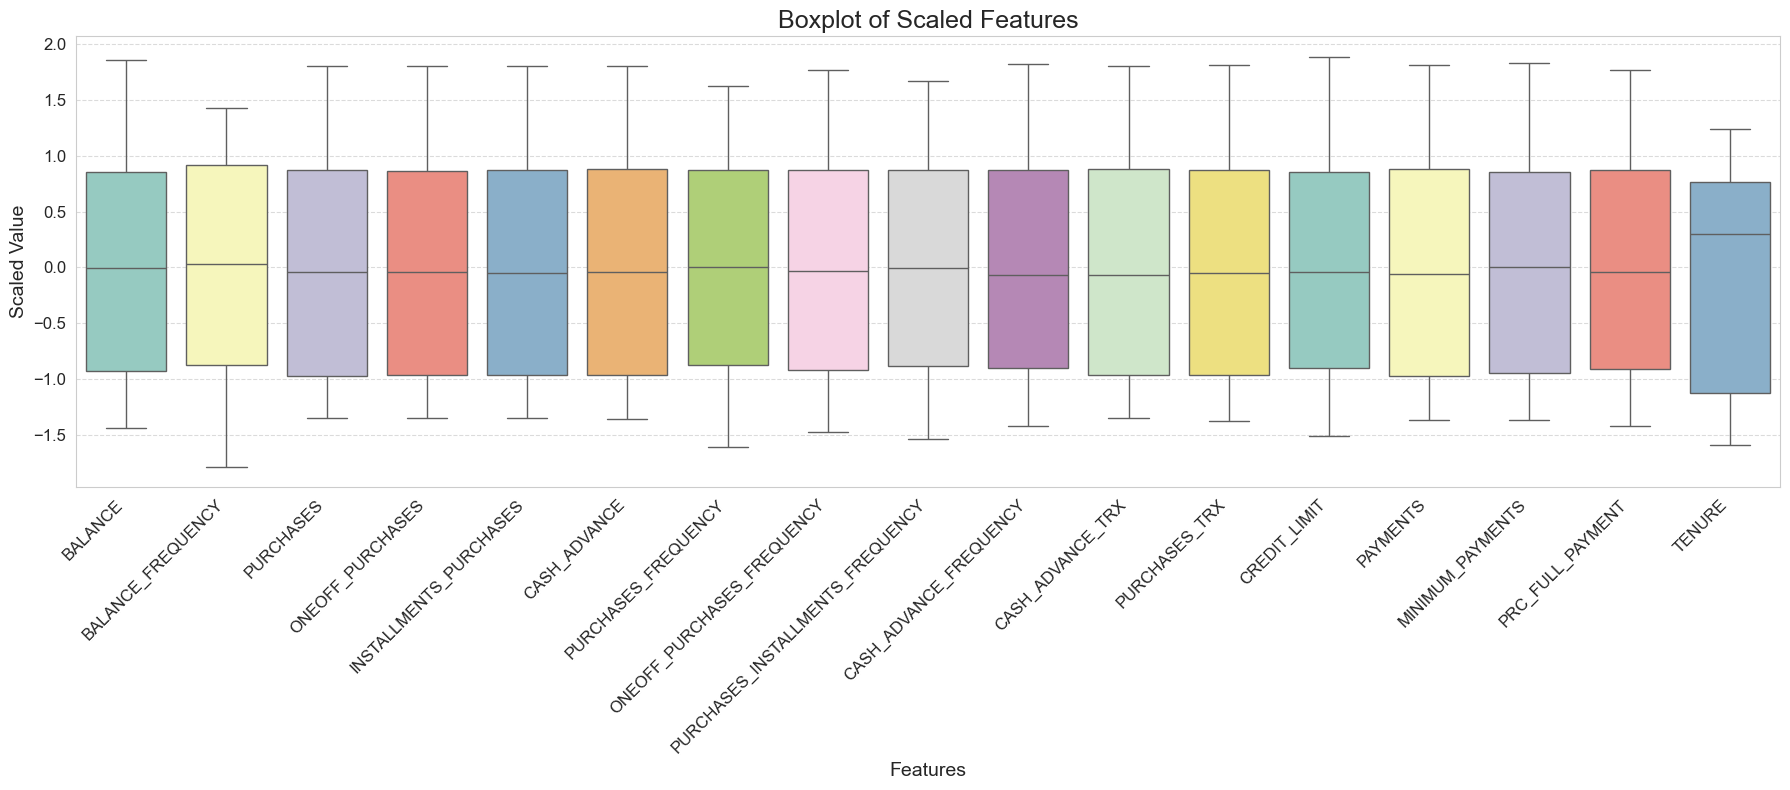

In [145]:
plt.figure(figsize=(18,8))
sns.boxplot(data=df_scaled, showfliers=False, palette="Set3")
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Boxplot of Scaled Features', fontsize=18)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Scaled Value', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# SCATTER PLOT

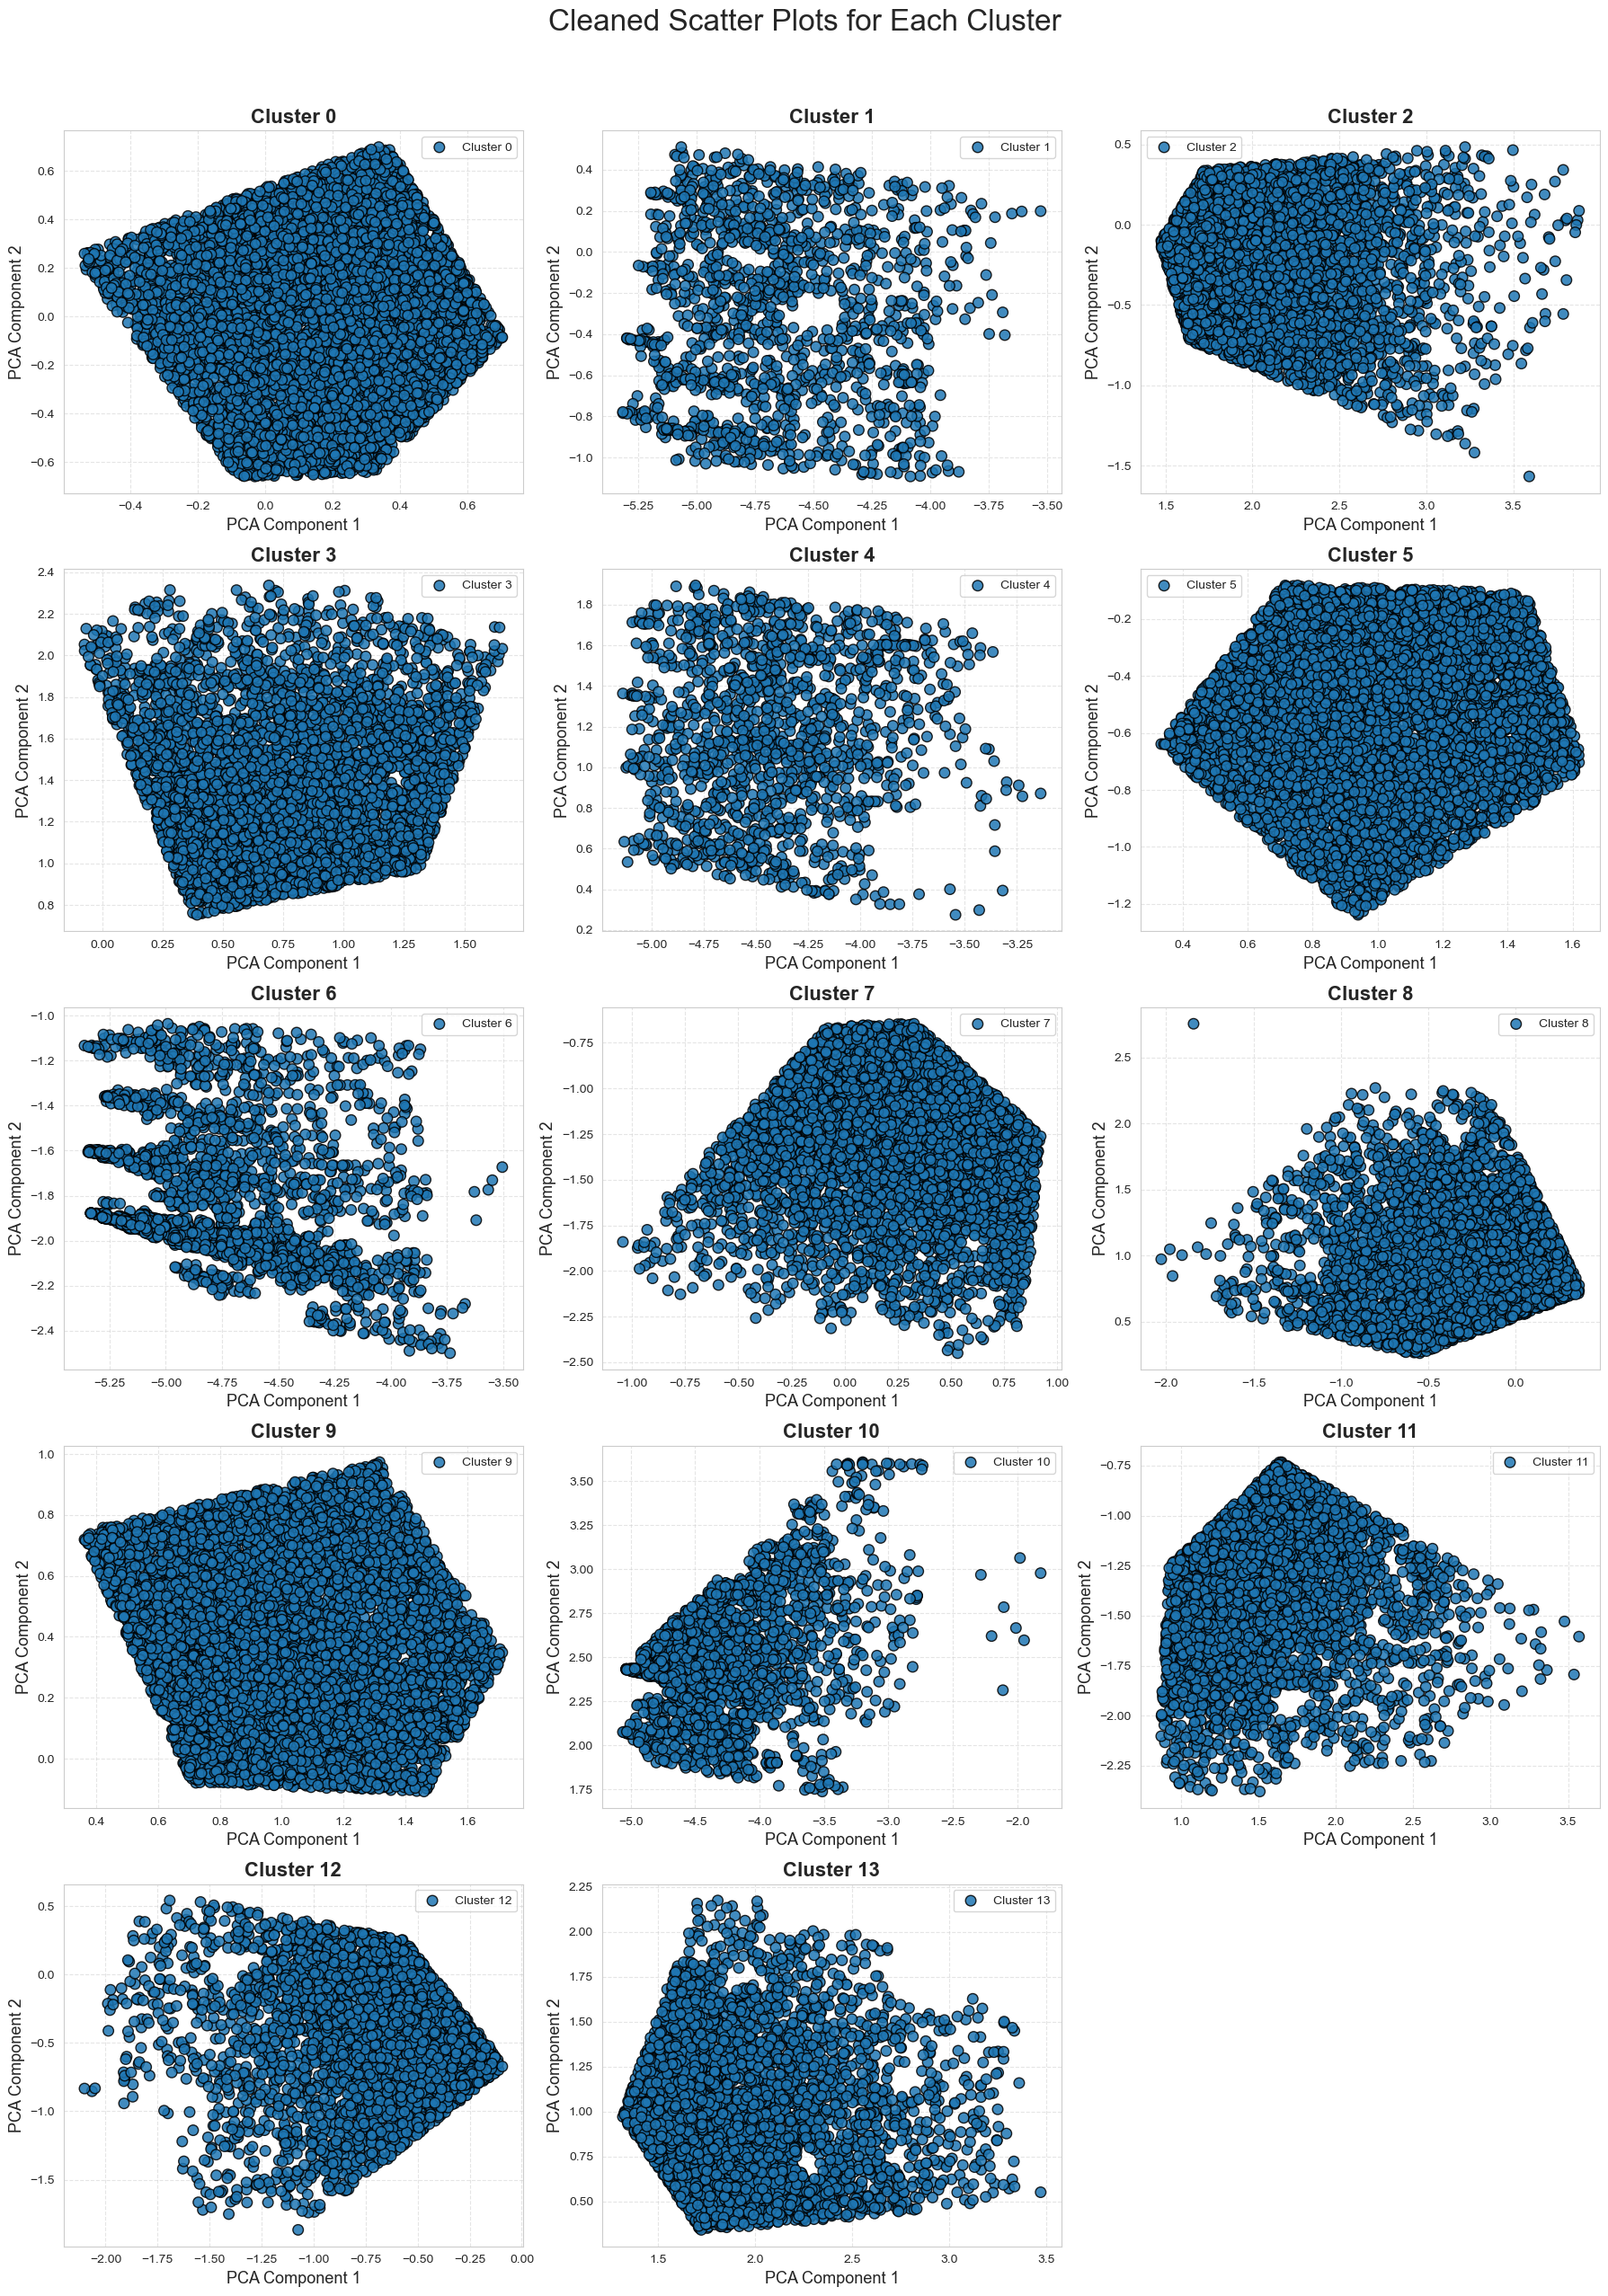

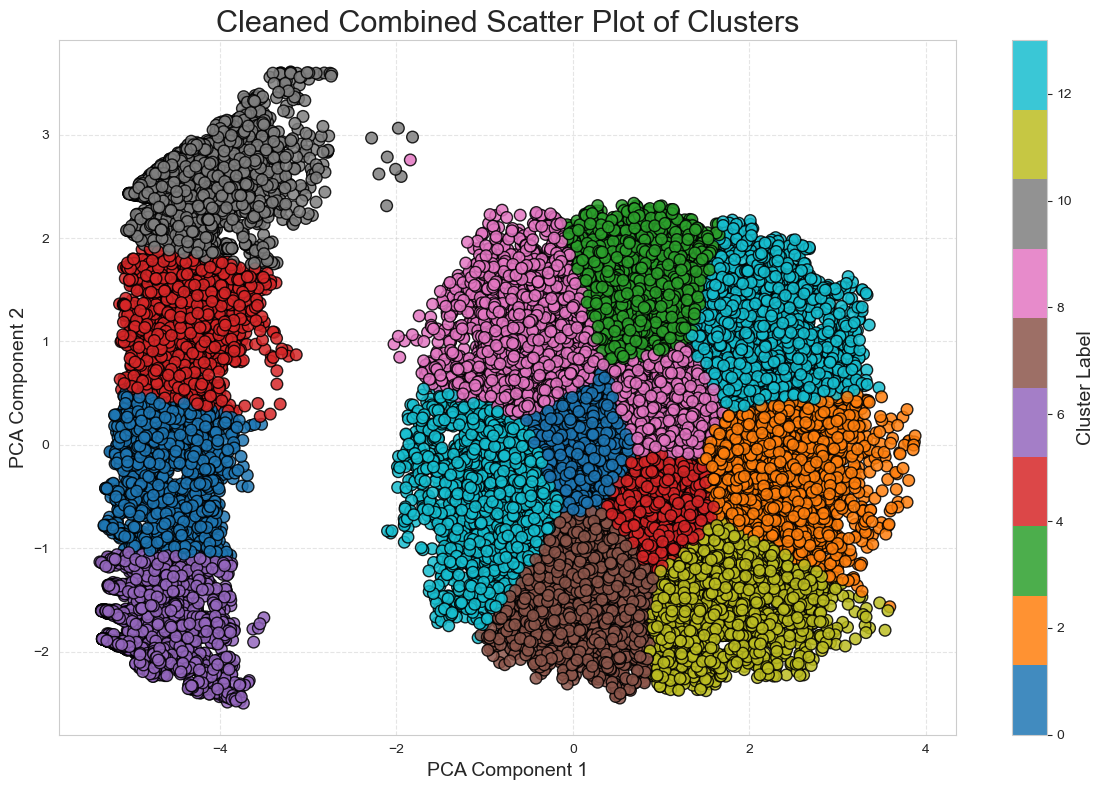

In [156]:
# Find unique cluster labels
unique_labels = np.unique(labels_clean)
n_clusters = len(unique_labels)

# Setup dynamic grid size
cols = 3
rows = (n_clusters + cols - 1) // cols

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()

for idx, label in enumerate(unique_labels):
    ax = axes[idx]
    cluster_points = X_pca_clean[labels_clean == label]
    ax.scatter(
        cluster_points[:, 0], 
        cluster_points[:, 1], 
        s=70, 
        label=f'Cluster {label}',
        cmap='tab10',  # Better color map
        c=[label]*len(cluster_points),
        edgecolors='k', 
        alpha=0.85
    )
    ax.set_title(f'Cluster {label}', fontsize=16, fontweight='bold')
    ax.set_xlabel('PCA Component 1', fontsize=13)
    ax.set_ylabel('PCA Component 2', fontsize=13)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend()

# Hide empty subplots
for idx in range(n_clusters, len(axes)):
    fig.delaxes(axes[idx])

fig.suptitle('Cleaned Scatter Plots for Each Cluster', fontsize=24, fontweight='light', y=1.02)

plt.tight_layout()
plt.show()

# Step 5: Plot Combined Scatter Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    X_pca_clean[:, 0], 
    X_pca_clean[:, 1], 
    c=labels_clean, 
    cmap='tab10', 
    s=70, 
    edgecolors='k', 
    alpha=0.85
)

plt.title('Cleaned Combined Scatter Plot of Clusters', fontsize=22, fontweight='light')
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Histo + KDE

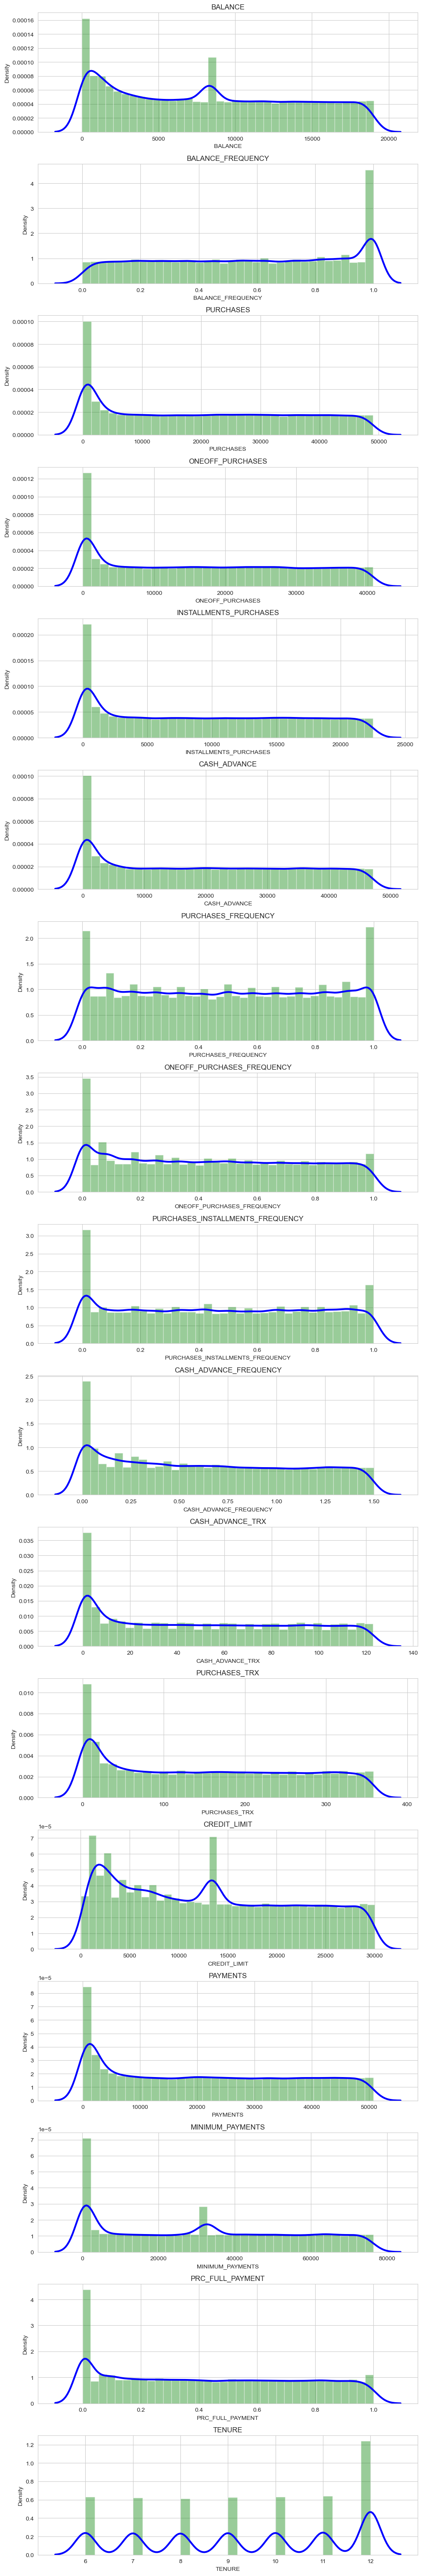

In [157]:
plt.figure(figsize=(10,60))
for i in range(0,17):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color': 'b', 'bw': 0.1, 'lw':3, 'label': 'KDE'}, hist_kws={'color':'g'})
    plt.title(df.columns[i])
plt.tight_layout()

# Heatmap

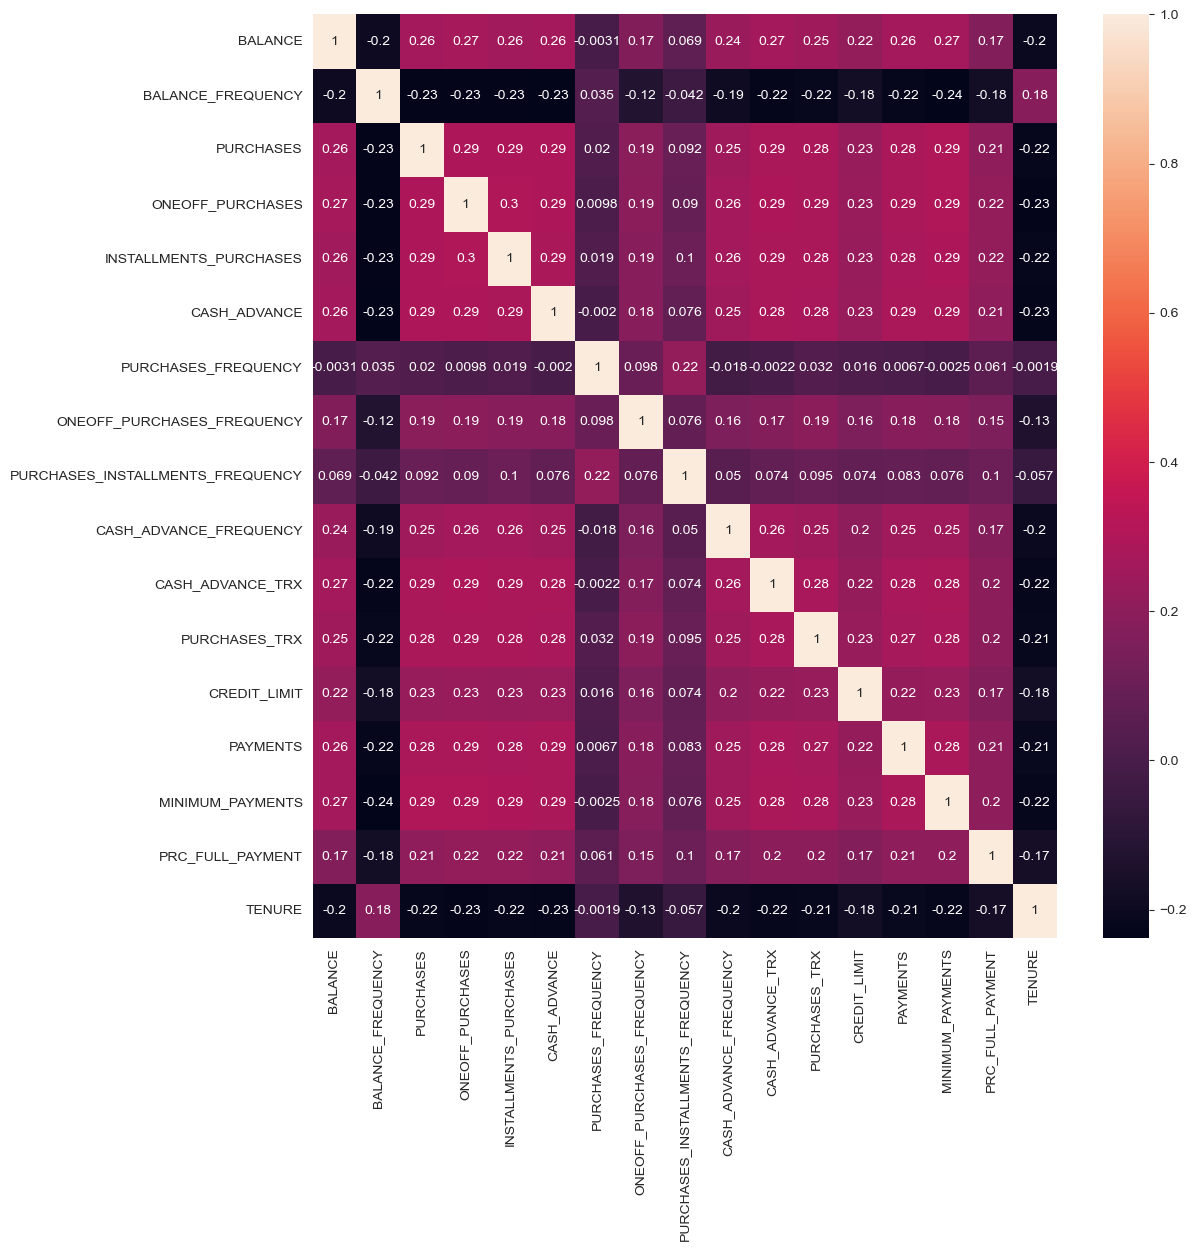

In [158]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

# PCA With Silhouette Score

In [159]:
pca_scores = []
n_components_range = list(range(2, min(scaled_df.shape[1] + 1, 8)))  # Test 2 to min(10, #features)
if not n_components_range:
    print("Error: Too few features for PCA. Using raw features instead.")
    X_pca_best = scaled_df
    best_n_components = scaled_df.shape[1]
    best_pca_score = -1
else:
    best_pca_score = -1
    best_n_components = 0
    X_pca_best = None

    print("\nTesting PCA components...")
    for n in n_components_range:
        try:
            pca = PCA(n_components=n)
            X_pca = pca.fit_transform(scaled_df)
            kmeans_temp = KMeans(n_clusters=min(3, X_pca.shape[0]), random_state=42)
            labels = kmeans_temp.fit_predict(X_pca)
            score = silhouette_score(X_pca, labels)
            pca_scores.append((n, score))
            print(f"PCA n_components={n}, Silhouette Score={score:.4f}")
            if score > best_pca_score:
                best_pca_score = score
                best_n_components = n
                X_pca_best = X_pca
        except ValueError as e:
            print(f"Error with PCA n_components={n}: {e}")
            continue

    if X_pca_best is None:
        print("Error: PCA failed for all components. Using raw features instead.")
        X_pca_best = scaled_df
        best_n_components = scaled_df.shape[1]

print(f"\nBest PCA: n_components={best_n_components} with Silhouette Score={best_pca_score:.4f}")



Testing PCA components...
PCA n_components=2, Silhouette Score=0.3587
PCA n_components=3, Silhouette Score=0.2755
PCA n_components=4, Silhouette Score=0.2135
PCA n_components=5, Silhouette Score=0.2006
PCA n_components=6, Silhouette Score=0.1703
PCA n_components=7, Silhouette Score=0.1561

Best PCA: n_components=2 with Silhouette Score=0.3587


# Hyper Parameter Tuning
# Finding 'K' value by Elbow method & Silhouette Score

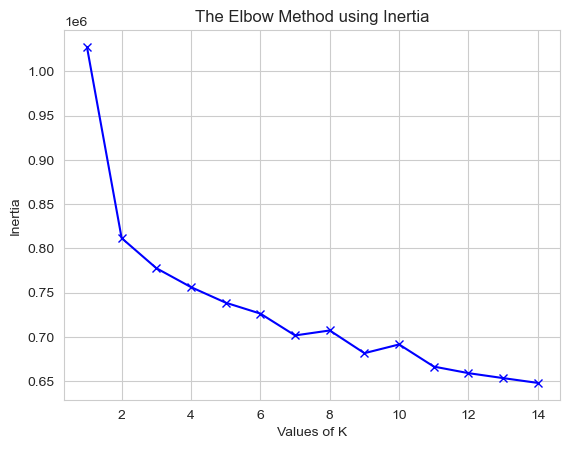

In [160]:
inertia = []
range_val =range(1,15)

for i in range_val:
    kmean= KMeans (n_clusters=i)
    kmean.fit_predict(pd.DataFrame (scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


 Finding best k using Silhouette Score and Inertia...
k=2 ➔ Silhouette Score = 0.6862
k=3 ➔ Silhouette Score = 0.3587
k=4 ➔ Silhouette Score = 0.3604
k=5 ➔ Silhouette Score = 0.3458
k=6 ➔ Silhouette Score = 0.3636
k=7 ➔ Silhouette Score = 0.3611
k=8 ➔ Silhouette Score = 0.3487
k=9 ➔ Silhouette Score = 0.3366
k=10 ➔ Silhouette Score = 0.3591
k=11 ➔ Silhouette Score = 0.3512
k=12 ➔ Silhouette Score = 0.3506
k=13 ➔ Silhouette Score = 0.3517
k=14 ➔ Silhouette Score = 0.3507

 Best number of clusters: 2 with Silhouette Score: 0.6862


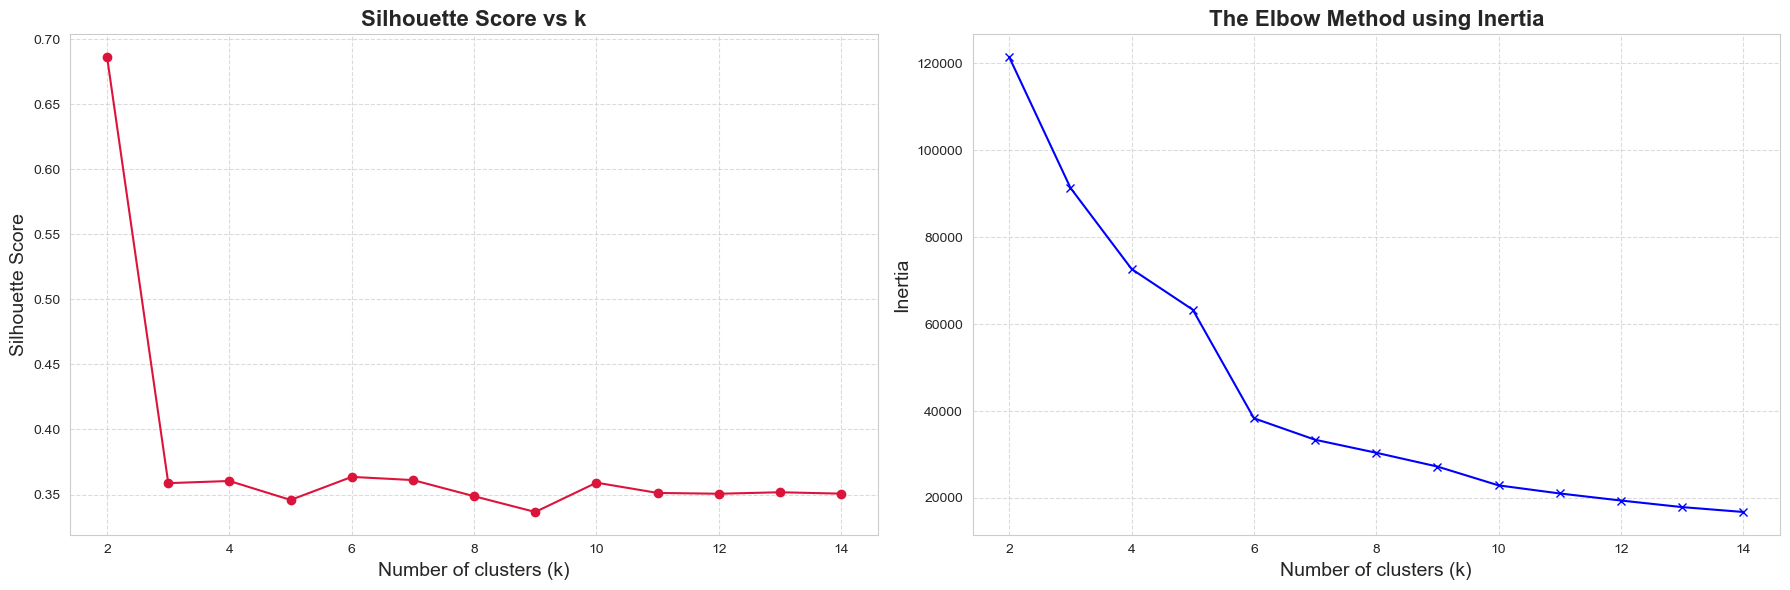

In [161]:
max_k = 14

silhouette_scores = []
inertia_scores = []
best_score = -1
best_k = 0

print("\n Finding best k using Silhouette Score and Inertia...")

# Loop through different values of k
for k in range(2, max_k + 1):
    try:
        # Fit KMeans
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X_pca_best)

        # Silhouette Score
        sil_score = silhouette_score(X_pca_best, labels)
        silhouette_scores.append((k, sil_score))
        print(f"k={k} ➔ Silhouette Score = {sil_score:.4f}")

        # Save best k
        if sil_score > best_score:
            best_score = sil_score
            best_k = k

        # Inertia
        inertia_scores.append((k, kmeans.inertia_))

    except ValueError as e:
        print(f"Error with k={k}: {e}")
        continue

# Fallback if no valid k
if best_k == 0:
    print("\n No valid k found. Defaulting to k=2.")
    best_k = 2
    best_score = -1

print(f"\n Best number of clusters: {best_k} with Silhouette Score: {best_score:.4f}")

k_values_silhouette, scores_silhouette = zip(*silhouette_scores)
k_values_inertia, scores_inertia = zip(*inertia_scores)

# Plot side-by-side
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# 1. Silhouette Score Plot
axs[0].plot(k_values_silhouette, scores_silhouette, 'o-', color='crimson')
axs[0].set_title('Silhouette Score vs k', fontsize=16, fontweight='bold')
axs[0].set_xlabel('Number of clusters (k)', fontsize=14)
axs[0].set_ylabel('Silhouette Score', fontsize=14)
axs[0].grid(True, linestyle='--', alpha=0.7)

# 2. Elbow (Inertia) Plot
axs[1].plot(k_values_inertia, scores_inertia, 'bx-')
axs[1].set_title('The Elbow Method using Inertia', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Number of clusters (k)', fontsize=14)
axs[1].set_ylabel('Inertia', fontsize=14)
axs[1].grid(True, linestyle='--', alpha=0.7)

#  Adjust layout
plt.tight_layout()
plt.show()


# Model Building Using KMeans

In [164]:
kmeans_model=KMeans (2)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df, pd.DataFrame({'cluster': kmeans_model.labels_})],axis=1)

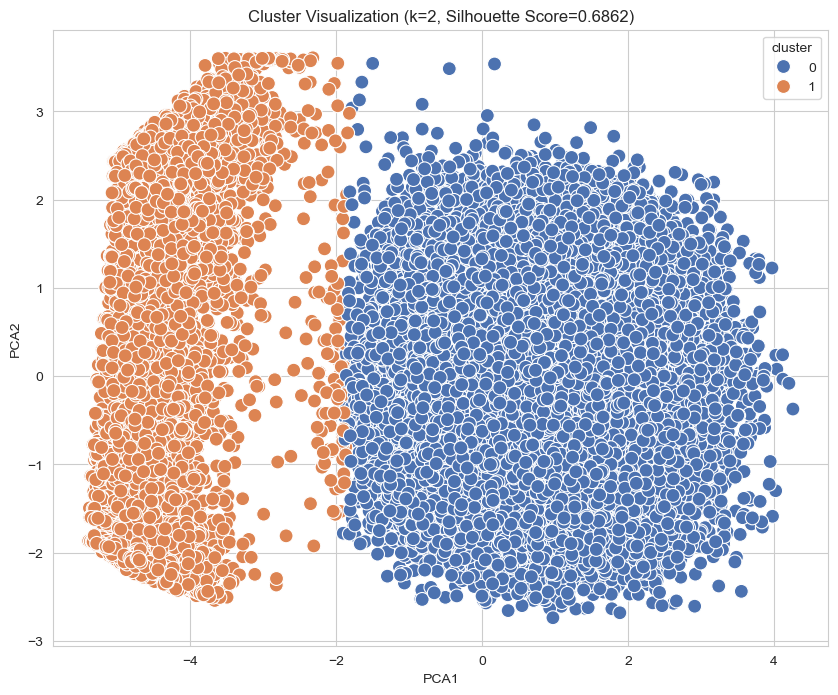

In [165]:
plt.figure(figsize=(10,8))
ax=sns.scatterplot(x="PCA1", y="PCA2", hue="cluster", data=pca_df_kmeans, palette='deep', s=100)
#plt.title("Clustering using K-Means Algorithm")
plt.title(f"Cluster Visualization (k={best_k}, Silhouette Score={best_score:.4f})")
plt.show()

# Create a DataFrame of cluster centers

In [166]:
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_, columns=[df.columns])

# Inverse transform the centers back to original scale
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
# If you want to see the centers after inverse transform:
cluster_centers

BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0  9489.947581          0.500620  24498.633349     20401.157147   
1  1597.187793          0.875068   1084.082820       670.093168   

  INSTALLMENTS_PURCHASES  CASH_ADVANCE PURCHASES_FREQUENCY  \
0           11250.267992  23637.839958            0.500065   
1             453.010603   1083.315294            0.489022   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.499660                         0.499490   
1                   0.202277                         0.364703   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.750603        61.297180    179.082166  14943.059328   
1               0.137894         3.541307     15.155925   4512.496576   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0  25333.774456     38086.478022         0.497078   9.002548  
1   1813.769864      2156.314660         0.154294  11.505316

In [167]:
# Creating a target column "Cluster" for storing the cluster segment

cluster_df = pd.concat([df, pd. DataFrame({'Cluster': kmeans_model.labels_})], axis=1)
cluster_df

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
0        40.900749           0.818182     95.400000          0.000000   
1      3202.467416           0.909091      0.000000          0.000000   
2      2495.148862           1.000000    773.170000        773.170000   
3      1666.670542           0.636364   1499.000000       1499.000000   
4       817.714335           1.000000     16.000000         16.000000   
...            ...                ...           ...               ...   
60445  8310.929865           0.226474   8238.438225      21801.704132   
60446  8310.929865           0.307606  37143.039261      27986.013029   
60447  8310.929865           0.368211  12878.836039      23816.478882   
60448  8310.929865           0.107981  14110.339021      16691.185710   
60449  8310.929865           0.627632  34626.443303      33300.182334   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.400000      0.000000             0.166667   
1                    0.000000   6442.945483             0.000000   
2                    0.000000      0.000000             1.000000   
3                    0.000000    205.788017             0.083333   
4                    0.000000      0.000000             0.083333   
...                       ...           ...                  ...   
60445             1536.123651  35239.955577             0.929502   
60446            17059.951772  22657.659913             0.205363   
60447            21344.216246  37170.061997             0.608675   
60448            19655.863965  13063.107243             0.946414   
60449             5325.312145  33421.727874             0.746149   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.000000                          0.083333   
1                        0.000000                          0.000000   
2                        1.000000                          0.000000   
3                        0.083333                          0.000000   
4                        0.083333                          0.000000   
...                           ...                               ...   
60445                    0.463192                          0.282620   
60446                    0.535996                          0.422172   
60447                    0.079632                          0.568956   
60448                    0.609091                          0.095855   
60449                    0.856358                          0.366771   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.000000                 0              2   1000.000000   
1                    0.250000                 4              0   7000.000000   
2                    0.000000                 0             12   7500.000000   
3                    0.083333                 1              1   7500.000000   
4                    0.000000                 0              1   1200.000000   
...                       ...               ...            ...           ...   
60445                0.474460               119             91  13384.945487   
60446                0.907725                29            165  13384.945487   
60447                1.035051                99            110  13384.945487   
60448                1.007543                 1             26  13384.945487   
60449                0.675992                23              4  13384.945487   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0        201.802084        139.509787          0.000000      12        1  
1       4103.032597       1072.340217          0.222222      12        1  
2        622.066742        627.284787          0.000000      12        1  
3          0.000000      32719.242701          0.000000      12        1  
4        678.334763        244.791237          0.000000      12        1  
...             ...               ...               .

In [168]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_1_df

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
138    19043.138560           1.000000  22009.920000       9449.070000   
153    13673.079610           1.000000   9792.230000       3959.810000   
273     5131.319584           1.000000  32539.780000      26547.430000   
501    13479.288210           1.000000  41050.400000      40624.060000   
507     2643.343414           1.000000  26402.390000      22257.390000   
...             ...                ...           ...               ...   
60445   8310.929865           0.226474   8238.438225      21801.704132   
60446   8310.929865           0.307606  37143.039261      27986.013029   
60447   8310.929865           0.368211  12878.836039      23816.478882   
60448   8310.929865           0.107981  14110.339021      16691.185710   
60449   8310.929865           0.627632  34626.443303      33300.182334   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
138              12560.850000      0.000000             1.000000   
153               5832.420000   2444.445738             1.000000   
273               5992.350000      0.000000             1.000000   
501                426.340000      0.000000             0.833333   
507               4145.000000      0.000000             1.000000   
...                       ...           ...                  ...   
60445             1536.123651  35239.955577             0.929502   
60446            17059.951772  22657.659913             0.205363   
60447            21344.216246  37170.061997             0.608675   
60448            19655.863965  13063.107243             0.946414   
60449             5325.312145  33421.727874             0.746149   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
138                      0.750000                          1.000000   
153                      0.750000                          1.000000   
273                      1.000000                          1.000000   
501                      0.666667                          0.416667   
507                      1.000000                          0.333333   
...                           ...                               ...   
60445                    0.463192                          0.282620   
60446                    0.535996                          0.422172   
60447                    0.079632                          0.568956   
60448                    0.609091                          0.095855   
60449                    0.856358                          0.366771   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
138                  0.000000                 0            216  18000.000000   
153                  0.750000                26            216  20000.000000   
273                  0.000000                 0             98  11500.000000   
501                  0.000000                 0            157  17000.000000   
507                  0.000000                 0            114  16500.000000   
...                       ...               ...            ...           ...   
60445                0.474460               119             91  13384.945487   
60446                0.907725                29            165  13384.945487   
60447                1.035051                99            110  13384.945487   
60448                1.007543                 1             26  13384.945487   
60449                0.675992                23              4  13384.945487   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
138    23018.575830      18621.013310          0.000000      12        0  
153    11717.307940       6042.391629          0.000000      12        0  
273    26652.344320       1971.129435          0.083333      12        0  
501    36066.750680      15914.484620          0.083333      12        0  
507    24529.276620        534.032339          1.000000      12        0  
...             ...               ...     

In [169]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
0         40.900749           0.818182     95.400000          0.000000   
1       3202.467416           0.909091      0.000000          0.000000   
2       2495.148862           1.000000    773.170000        773.170000   
3       1666.670542           0.636364   1499.000000       1499.000000   
4        817.714335           1.000000     16.000000         16.000000   
...             ...                ...           ...               ...   
57989  17874.694207           0.981671  11197.593240       9481.161293   
58204   4762.167230           0.427739    126.835168       2486.530485   
58622   8310.929865           0.976504    799.879573      14406.454438   
59059   8310.929865           0.295309   3124.975298      12417.995479   
60015   8310.929865           0.132239   5182.208463       5539.047983   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.400000      0.000000             0.166667   
1                    0.000000   6442.945483             0.000000   
2                    0.000000      0.000000             1.000000   
3                    0.000000    205.788017             0.083333   
4                    0.000000      0.000000             0.083333   
...                       ...           ...                  ...   
57989             9085.792393   1306.288338             0.415096   
58204            16498.429300  13614.004466             0.307191   
58622             1101.822093  17713.088596             0.931770   
59059             7377.442337   7065.990717             0.365998   
60015              227.686124   6947.564428             0.914949   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.000000                          0.083333   
1                        0.000000                          0.000000   
2                        1.000000                          0.000000   
3                        0.083333                          0.000000   
4                        0.083333                          0.000000   
...                           ...                               ...   
57989                    0.087387                          0.467521   
58204                    0.077013                          0.208749   
58622                    0.024956                          0.363733   
59059                    0.323507                          0.846317   
60015                    0.004510                          0.579454   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.000000                 0              2   1000.000000   
1                    0.250000                 4              0   7000.000000   
2                    0.000000                 0             12   7500.000000   
3                    0.083333                 1              1   7500.000000   
4                    0.000000                 0              1   1200.000000   
...                       ...               ...            ...           ...   
57989                0.448004                45            128  14121.601286   
58204                0.479349                46             38  29241.135098   
58622                0.687093                12            113  13384.945487   
59059                0.115498                42             19  13384.945487   
60015                0.128012                 6             12  13384.945487   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0        201.802084        139.509787          0.000000      12        1  
1       4103.032597       1072.340217          0.222222      12        1  
2        622.066742        627.284787          0.000000      12        1  
3          0.000000      32719.242701          0.000000      12        1  
4        678.334763        244.791237          0.000000      12        1  
...             ...               ...     

In [170]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_3_df

Empty DataFrame
Columns: [BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE, Cluster]
Index: []

<Axes: xlabel='Cluster', ylabel='count'>

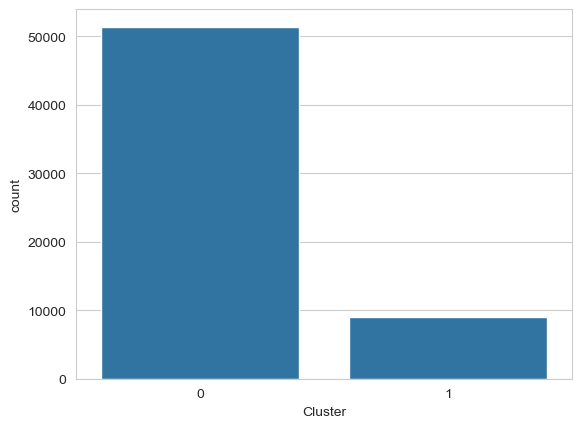

In [171]:
#visualization
sns.countplot(x='Cluster', data=cluster_df)

# Histogram

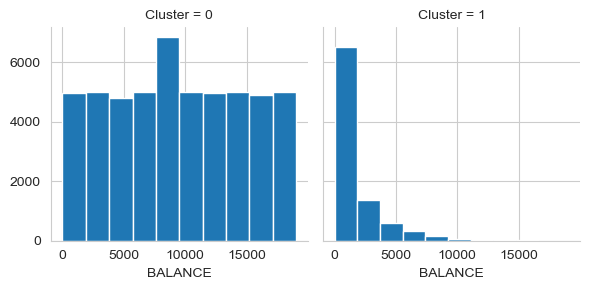

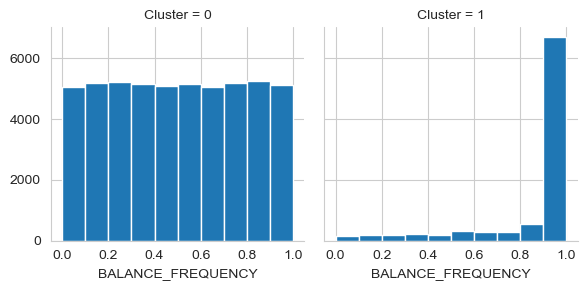

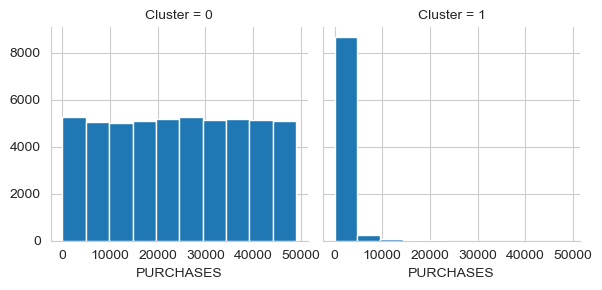

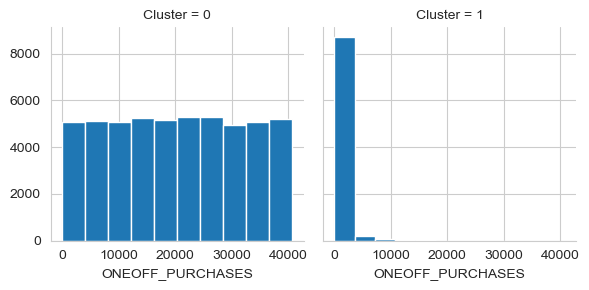

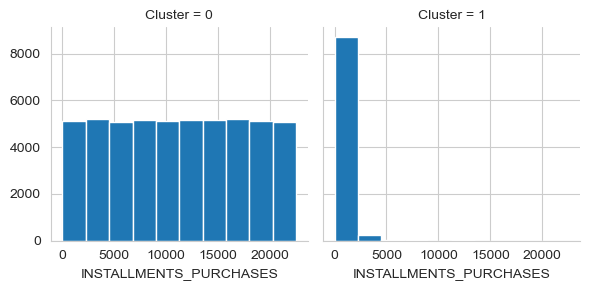

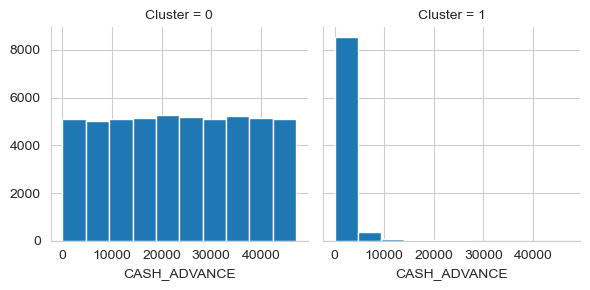

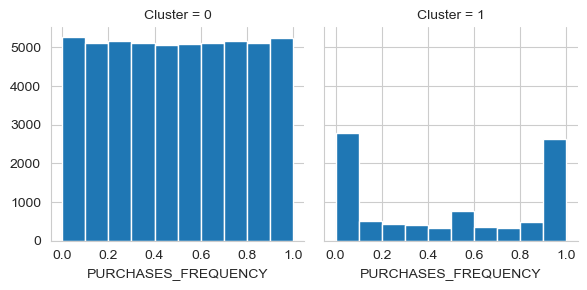

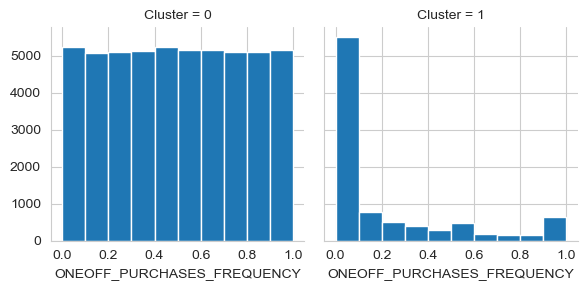

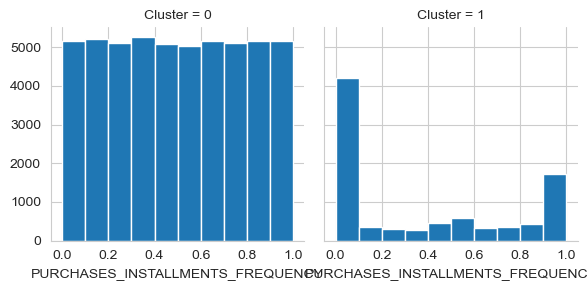

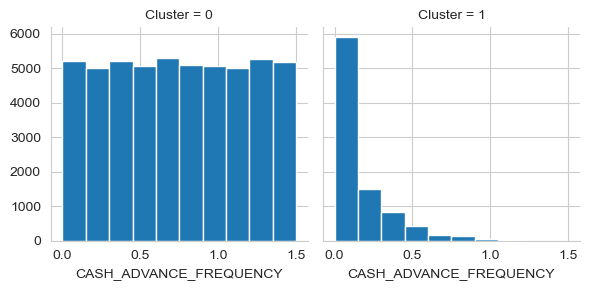

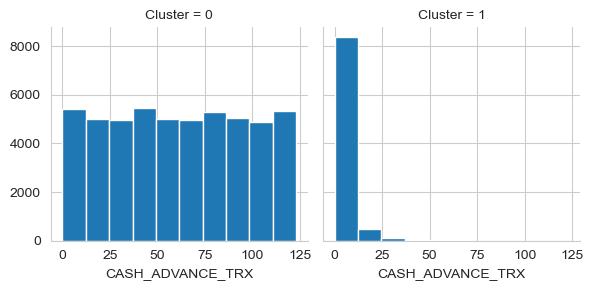

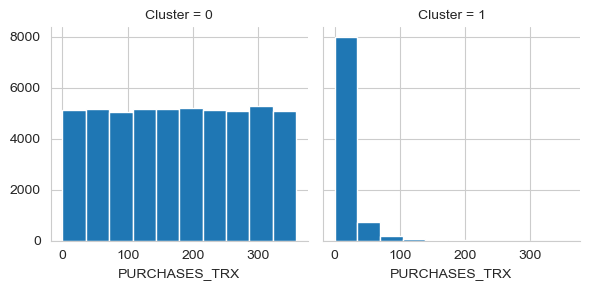

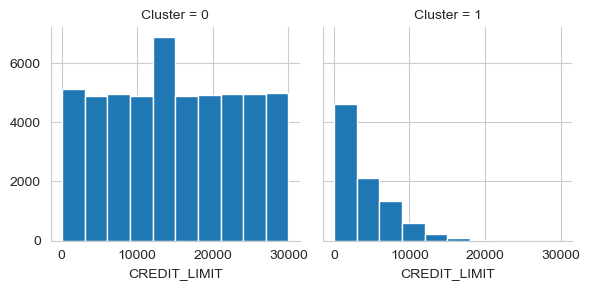

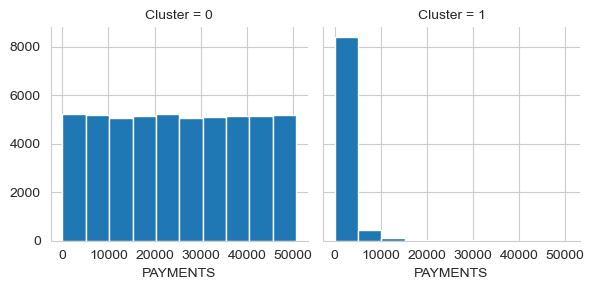

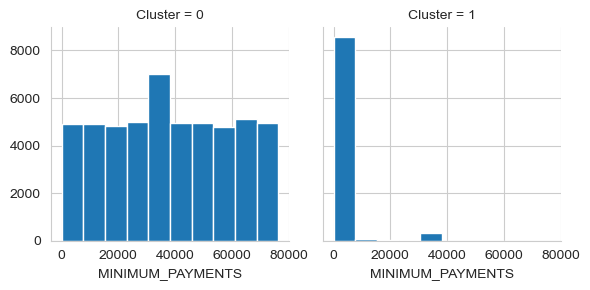

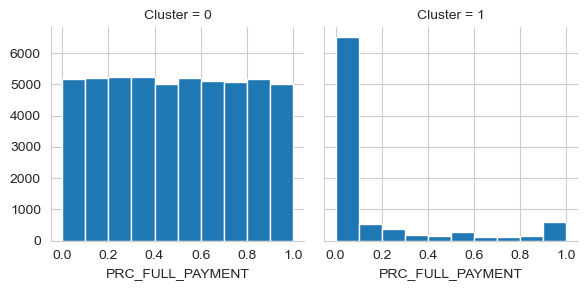

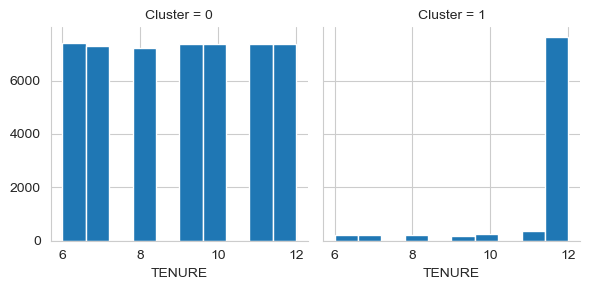

In [172]:
for c in cluster_df.drop(['Cluster'], axis=1):
    grid=sns.FacetGrid(cluster_df, col='Cluster')
    grid=grid.map(plt.hist,c)
plt.show()

# Saving the clustering model and the data with cluster label

In [173]:
cluster_df.to_csv("Clustered_Customer_Data.csv")

# DBSCAN Clustering

In [194]:
# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Tuned eps
dbscan_labels = dbscan.fit_predict(scaled_df)
dbscan_silhouette = silhouette_score(scaled_df, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")

DBSCAN Silhouette Score: 0.2705


# Agglomerative Clustering

In [195]:
# Agglomerative Clustering
sampled_df = resample(scaled_df, n_samples=5000, random_state=42)
agg = AgglomerativeClustering(n_clusters=best_k)  # using same best_k as KMeans
agg_labels = agg.fit_predict(sampled_df)
agg_silhouette = silhouette_score(sampled_df, agg_labels)
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette:.4f}")


Agglomerative Clustering Silhouette Score: 0.2722


# Hierarchical Clustering Dendogram

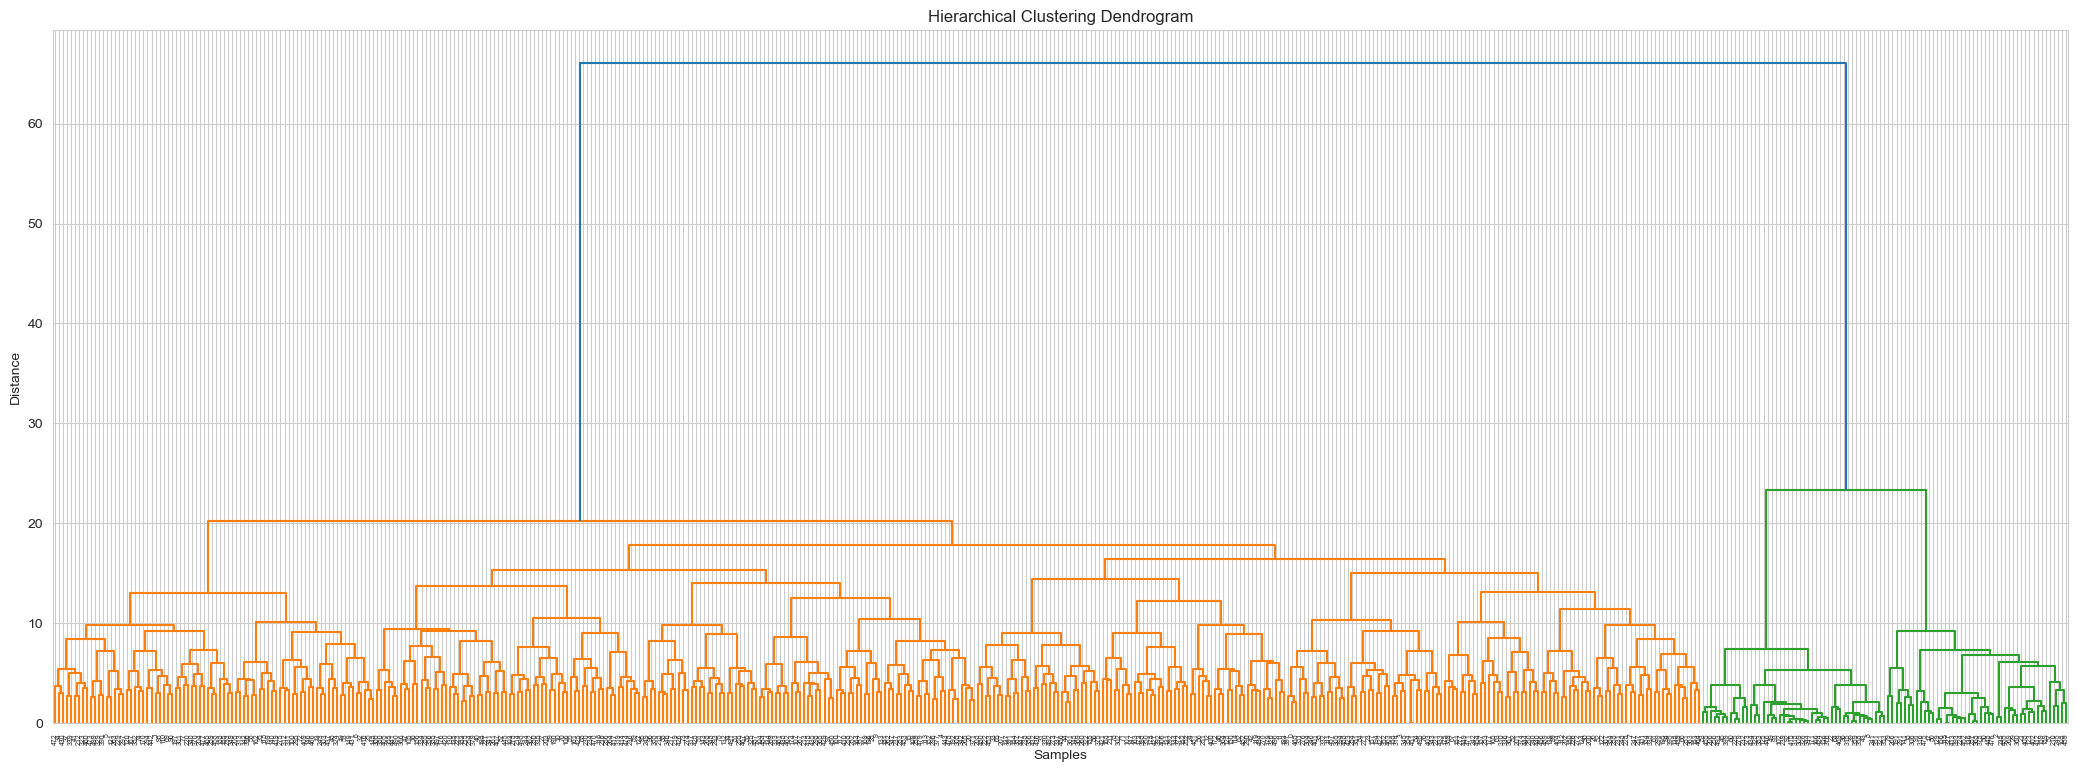

In [199]:
# Hierarchical Clustering Dendrogram
sampled_df = resample(scaled_df, n_samples=500, random_state=42)
linked = linkage(sampled_df, method='ward')
plt.figure(figsize=(26, 9))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()